In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.optimizers import Adam

In [ ]:
autotune=tf.data.AUTOTUNE
dp='/content/drive/MyDrive/Datasets/Animals/Animals'
train_ds=image_dataset_from_directory(dp,validation_split=.2,subset='training',seed=42,image_size=(224,224),batch_size=32)
val_ds=image_dataset_from_directory(dp,validation_split=.2,subset='validation',seed=42,image_size=(224,224),batch_size=32)
class_names=train_ds.class_names
train_ds=train_ds.map(lambda x,y:(preprocess_input(x),y)).cache().prefetch(buffer_size=autotune)
val_ds=val_ds.map(lambda x,y:(preprocess_input(x),y)).cache().prefetch(buffer_size=autotune)
no_of_classes=len(class_names)
print(no_of_classes)
print(class_names)

Found 3000 files belonging to 3 classes.
Using 2400 files for training.
Found 3000 files belonging to 3 classes.
Using 600 files for validation.
3
['cats', 'dogs', 'snakes']


In [ ]:
b_model=DenseNet121(include_top=False,weights='imagenet',input_shape=(224,224,3))
b_model.trainable=False

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x=b_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(128,activation='relu')(x)
x=Dropout(0.2)(x)
output=Dense(no_of_classes,activation='softmax')(x)
model=Model(inputs=b_model.input,outputs=output)
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
cb=ModelCheckpoint('/content/drive/MyDrive/Datasets/Animals/model.h5',monitor ='val_loss',mode='min',save_best_only=True,verbose=1)

In [ ]:
model.summary()

In [ ]:
history=model.fit(train_ds,validation_data=val_ds,epochs=15,callbacks=[cb])

Epoch 1/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8601 - loss: 0.3420
Epoch 1: val_loss improved from inf to 0.04071, saving model to /content/drive/MyDrive/Datasets/Animals/model.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 500s 6s/step - accuracy: 0.8612 - loss: 0.3393 - val_accuracy: 0.9917 - val_loss: 0.0407
Epoch 2/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9876 - loss: 0.0300
Epoch 2: val_loss improved from 0.04071 to 0.03601, saving model to /content/drive/MyDrive/Datasets/Animals/model.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - accuracy: 0.9876 - loss: 0.0300 - val_accuracy: 0.9917 - val_loss: 0.0360
Epoch 3/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9970 - loss: 0.0151
Epoch 3: val_loss did not improve from 0.03601
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.9970 - loss: 0.0152 - val_accuracy: 0.9883 - val_loss: 0.0439
Epoch 4/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9959 - loss: 0.0121
Epoch 4: val_loss did not improve from 0.03601
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.9959 - loss: 0.0121 - val_accuracy: 0.9883 - val_loss: 0.0413
Epoch 5/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9931 - loss: 0.0186
Epoch 5: val_loss did not improve from 0.03601
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.9932 - loss: 0.0186 - val_accuracy: 0.9883 - val_loss: 0.0397
Epoch 6/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9947 - loss: 0.0125
Epoch 6: val_loss improved from 0.03601 to 0.03453, sa

75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - accuracy: 0.9947 - loss: 0.0125 - val_accuracy: 0.9917 - val_loss: 0.0345
Epoch 7/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9992 - loss: 0.0052
Epoch 7: val_loss improved from 0.03453 to 0.03230, saving model to /content/drive/MyDrive/Datasets/Animals/model.h5


75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - accuracy: 0.9992 - loss: 0.0052 - val_accuracy: 0.9883 - val_loss: 0.0323
Epoch 8/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9919 - loss: 0.0193
Epoch 8: val_loss did not improve from 0.03230
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.9919 - loss: 0.0193 - val_accuracy: 0.9900 - val_loss: 0.0407
Epoch 9/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9985 - loss: 0.0065
Epoch 9: val_loss did not improve from 0.03230
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.9985 - loss: 0.0064 - val_accuracy: 0.9900 - val_loss: 0.0346
Epoch 10/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 1.0000 - loss: 0.0025
Epoch 10: val_loss did not improve from 0.03230
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0.9933 - val_loss: 0.0331
Epoch 11/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 1.0000 - loss: 0.0015
Epoch 11: val_loss did not improve from 0.03230
75/

<function matplotlib.pyplot.show(close=None, block=None)>

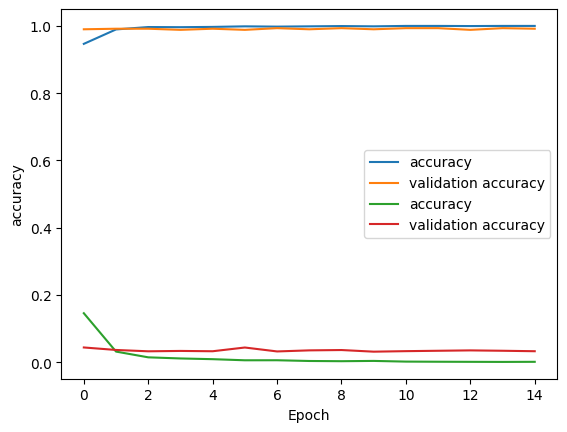

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show
plt.plot(history.history['loss'],label='accuracy')
plt.plot(history.history['val_loss'],label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show

In [ ]:
model.save('/content/drive/MyDrive/Datasets/Animals/model.keras')